# データの確認

Text(0, 0.5, 'Stiffness')

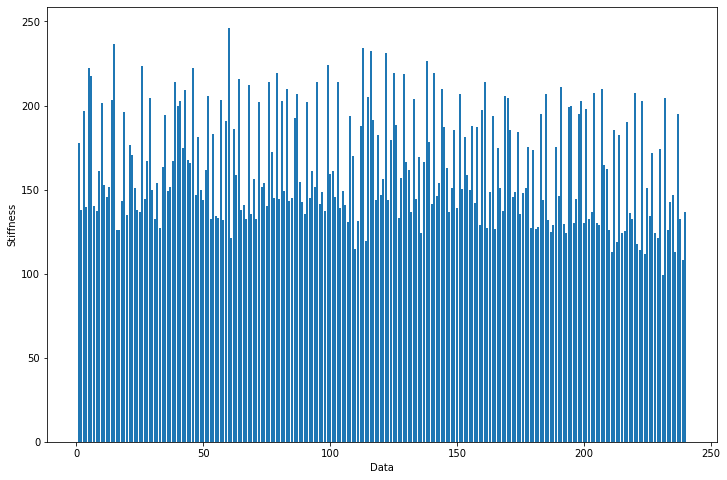

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('RUD_K_okada2_test3.csv')

num = np.linspace(1,np.size(df.iloc[:,0]),np.size(df.iloc[:,0]))
stif = df.iloc[:,-1]

plt.figure(figsize=(12, 8))
plt.bar(num,stif)
plt.xlabel('Data')
plt.ylabel('Stiffness')

# 外れ値の処理（トレーニングデータ）

Text(0, 0.5, 'Stiffness')

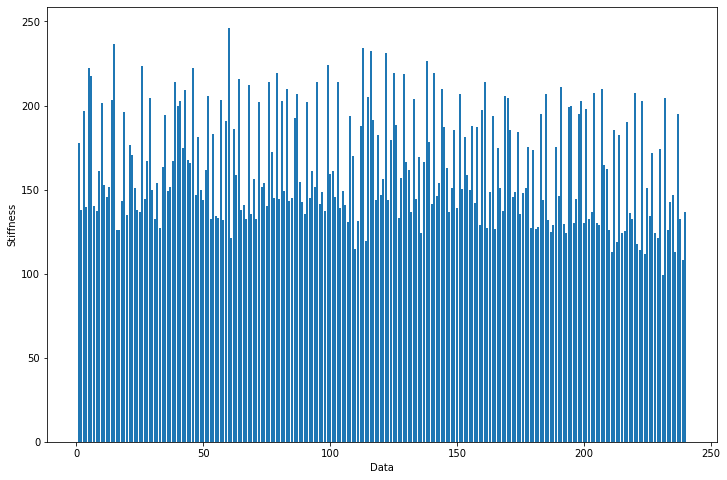

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('RUD_K_okada2_test3.csv')

#外れ値の検出、削除

#第一四分位数、第三四分位数
q1 = df['Var5'].quantile(.25)
q3 = df['Var5'].quantile(.75)

#四分位範囲
iqr = q3-q1

#一般的に四分位範囲を１．５倍に拡大し、そこから外れる値を外れ値とする
limit_low = q1-iqr*1.5
limit_high = q3+iqr*1.5

#print(q1,q3,limit_low,limit_high)

#外れ値の行を除いたデータフレームを作成
df = df.query('@limit_low < Var5 <@limit_high')

#外れ値を除いたデータフレームの行数を確認
#print(df.shape)

#作成したデータフレームの可視化
num = np.linspace(1,np.size(df.iloc[:,0]),np.size(df.iloc[:,0]))
stif = df.iloc[:,-1]

plt.figure(figsize=(12, 8))
plt.bar(num,stif)
plt.xlabel('Data')
plt.ylabel('Stiffness')

In [7]:
df.to_csv("RUD_D_okada2.csv", index=False)

In [38]:
#外れ値（除外した値）の参照

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('RUD_K_okada2_test3.csv')

df.query('not @limit_low < Var5 <@limit_high')

,Var1,Var2,Var3,Var4,Var5,Var6


# 外れ値の処理（テストデータ）

(231, 10)


<BarContainer object of 231 artists>

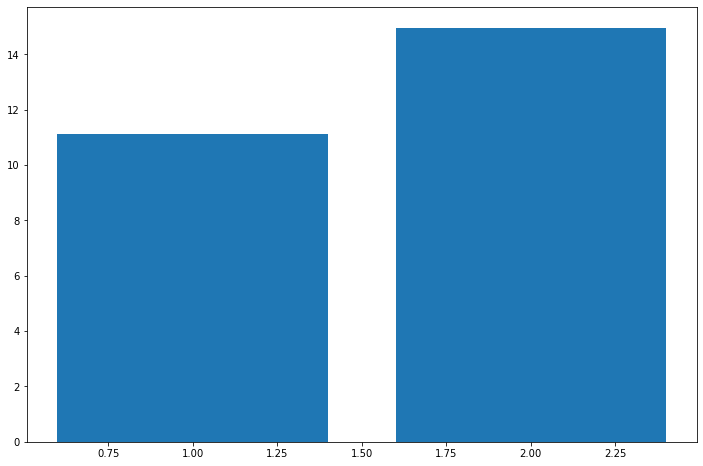

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df2 = pd.read_csv('okada_K_test.csv')

#外れ値の検出、削除

#第一四分位数、第三四分位数
q1 = df2['Var7'].quantile(.25)
q3 = df2['Var7'].quantile(.75)

#四分位範囲
iqr = q3-q1

#一般的に四分位範囲を１．５倍に拡大し、そこから外れる値を外れ値とする
limit_low = q1-iqr*1.5
limit_high = q3+iqr*1.5

#print(q1,q3,limit_low,limit_high)

#外れ値の行を除いたデータフレームを作成
df2 = df2.query('@limit_low < Var7 <@limit_high')

#外れ値を除いたデータフレームの行数を確認
print(df2.shape)

#作成したデータフレームの可視化
num = np.linspace(1,np.size(df2.iloc[:,0]),np.size(df2.iloc[:,0]))
stif = df2.iloc[:,-1]

plt.figure(figsize=(12, 8))
plt.bar(num,stif)

In [19]:
df.to_csv("KCB2.csv", index=False)
df2.to_csv("okada_K2.csv", index=False)

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('okada_K2.csv') 

df = df.abs()

print(df)

         Var1      Var2      Var3      Var4      Var5    labels       Var7
0    0.562464  1.867338  1.028091  0.684719  0.814126  1.472114   9.244285
1    0.684705  1.282417  1.058356  0.355664  0.496697  1.472114   6.539427
2    0.427589  0.219391  0.486631  0.618340  1.269943  1.472114   6.926131
3    0.268829  0.433362  0.193211  0.644722  0.884498  1.472114  10.073867
4    0.147491  0.032799  0.042569  0.111108  0.391127  1.472114   8.998000
..        ...       ...       ...       ...       ...       ...        ...
226  0.685267  0.633712  0.181157  0.644860  1.273153  1.445698  13.046594
227  0.303195  0.137775  0.235668  0.888859  0.042016  1.445698   5.099401
228  0.152532  1.015281  1.078981  0.744014  1.506638  1.445698   8.361087
229  0.616511  0.670158  0.480288  0.658691  0.556211  1.445698   7.792147
230  0.938526  0.954161  0.427016  0.792664  1.003580  1.445698   8.482130

[231 rows x 7 columns]


In [12]:
df.to_csv("okada_K3.csv", index=False)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('okada_K.csv') 

mean = df.mean(axis=0)
df -= mean
std = df.std(axis=0)
df /= std

print(mean, std, df)

Var1     -9.000573e-17
Var2     -5.313537e-16
Var3     -1.000571e-16
Var4     -2.448887e-16
Var5     -4.660195e-17
labels    1.295717e-15
Var7      1.112421e+01
dtype: float64 Var1       1.000000
Var2       1.000000
Var3       1.000000
Var4       1.000000
Var5       1.000000
labels     1.000000
Var7      15.001114
dtype: float64          Var1      Var2      Var3      Var4      Var5    labels      Var7
0   -0.562464 -1.867338 -1.028091 -0.684719  0.814126 -1.472114 -0.125319
1   -0.684705 -1.282417 -1.058356 -0.355664  0.496697 -1.472114 -0.305629
2   -0.427589  0.219391 -0.486631 -0.618340 -1.269943 -1.472114 -0.279851
3   -0.268829 -0.433362 -0.193211 -0.644722  0.884498 -1.472114 -0.070018
4    0.147491  0.032799 -0.042569 -0.111108  0.391127 -1.472114 -0.141737
..        ...       ...       ...       ...       ...       ...       ...
238  0.488264  1.768827 -0.021468 -0.567800 -1.359432  1.445698  0.838806
239 -0.303195 -0.137775 -0.235668 -0.888859  0.042016  1.445698 -0.401624
240

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('RUD_K_okada2_test.csv')

df_input = df.iloc[:,:4]
df_input.head()

,Var1,Var2,Var3,Var4
0,-0.644225,-0.274712,-0.129285,0.775207
1,0.369275,-0.537741,-0.001772,0.947899
2,-0.791587,1.519402,-0.044993,0.788592
3,-0.688017,0.922465,-0.050487,0.476167
4,0.477977,-0.460325,0.016844,0.106993


In [30]:
df_input.to_csv("RUD_K_okada2_test2.csv", index=False)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Y = []

df = pd.read_csv('RUD_J_okada2.csv')

#for i in range(np.size(df,0)):
 #   Y.append(np.random.uniform(0.0000633, 0.000413974))

#X = df.iloc[:,:-1]

Y

[0.00039752902284653573,
 0.00012902959587814708,
 0.0003895478941584586,
 0.0002973365019998686,
 0.00027799271627499506,
 0.00013779595635984187,
 0.00010777949265754541,
 6.58973516751065e-05,
 0.0003941731391930894,
 0.00027448366138815183,
 0.00022692105720113385,
 0.00036119878938740437,
 8.875620181064177e-05,
 0.00017970509531270028,
 0.0002633309185527853,
 0.00039120182016485886,
 0.00019426544706650236,
 0.00028555050874192194,
 0.00028470181421574994,
 0.0001888092794245655,
 0.00015101686275053,
 0.00022970372192096392,
 0.00014617374760725956,
 0.00014272558435583319,
 0.000289659713199918,
 0.00012394334391478278,
 0.00029511960158250445,
 0.0002795297707145284,
 0.0003824400181970377,
 0.000226551719790271,
 0.00012705064435361826,
 0.0002091230457690956,
 0.000315799079207195,
 0.00018738502325003401,
 0.0003971123089795914,
 0.0003943417816571419,
 0.0003359027918263249,
 0.0002414866873250182,
 0.00035291966477637516,
 0.00031909145657622027,
 0.00015771070802034345,

In [ ]:
Y = [0.00039752902284653573;
 0.00012902959587814708;
 0.0003895478941584586;
 0.0002973365019998686;
 0.00027799271627499506;
 0.00013779595635984187;
 0.00010777949265754541;
 6.58973516751065e-05;
 0.0003941731391930894;
 0.00027448366138815183;
 0.00022692105720113385;
 0.00036119878938740437;
 8.875620181064177e-05;
 0.00017970509531270028;
 0.0002633309185527853;
 0.00039120182016485886;
 0.00019426544706650236;
 0.00028555050874192194;
 0.00028470181421574994;
 0.0001888092794245655;
 0.00015101686275053;
 0.00022970372192096392;
 0.00014617374760725956;
 0.00014272558435583319;
 0.000289659713199918;
 0.00012394334391478278;
 0.00029511960158250445;
 0.0002795297707145284;
 0.0003824400181970377;
 0.000226551719790271;
 0.00012705064435361826;
 0.0002091230457690956;
 0.000315799079207195;
 0.00018738502325003401;
 0.0003971123089795914;
 0.0003943417816571419;
 0.0003359027918263249;
 0.0002414866873250182;
 0.00035291966477637516;
 0.00031909145657622027;
 0.00015771070802034345;
 0.0001263918602371371;
 0.00015958394170904015;
 0.00020426526413428568;
 0.0002451242348756841;
 0.00016323459000630326;
 0.00026528247159301766;
 0.00013676631967133037;
 0.00018525775484712839;
 0.00012473407771595687;
 0.00025670635642950526;
 0.00014864881765173392;
 0.00023317159139650477;
 0.0002503706122461899;
 8.954888102176802e-05;
 0.0002823072603437412;
 0.0003470135581752226;
 0.00017454827997396622;
 0.00019971494659057514;
 0.00020724569823415607;
 0.00033447084287279176;
 0.00032037376252996093;
 7.862209282344037e-05;
 0.00020763856110149443;
 0.0002699687478549814;
 6.837841072253316e-05;
 0.00026098109006281157;
 0.0002054644465002976;
 0.00038116270591808386;
 0.0001122352160704207;
 0.00010880946046899316;
 0.0003016512256851597;
 0.0003298242348325981;
 0.00021154654094539529;
 0.000337197005762818;
 0.0002232516050226666;
 0.0002775867181881649;
 0.0003616850470998138;
 0.0003230220713561731;
 7.571732267103383e-05;
 9.065863715160558e-05;
 8.26994574369585e-05;
 0.0001805296842325233;
 9.251611321988245e-05;
 0.00027963005129306485;
 9.159779784678035e-05;
 0.0002503255150169767;
 0.0002873248027228102;
 9.916251796004065e-05;
 0.0003779774342392108;
 0.00013154116601335402;
 7.838881130266415e-05;
 0.00022900401873946014;
 0.0002636854278146468;
 0.00017489463351568263;
 0.0001811315972022215;
 0.00014322248023198689;
 0.00034216531913286224;
 0.00018651907943839855;
 0.00038995349205825987;
 0.0001347654061090436;
 0.00040833204272773516;
 0.00018494090033718109;
 0.00017831978630853952;
 0.0004021904688048947;
 0.00017081502444452523;
 0.00033299152232970546;
 0.0003522669530486573;
 0.0001390900767534334;
 8.474068000768497e-05;
 0.00018497597936206734;
 0.00011789126450451349;
 0.00033693024069115336;
 0.0003988430615935874;
 0.00018078777189384394;
 0.00011610389568205502;
 0.00019216926817228848;
 0.0002749252568938602;
 0.00021592773032350312;
 0.00021795737906328544;
 0.00019316474522223834;
 7.686198382660015e-05;
 0.0001173745165254494;
 0.00015095291316270866;
 0.00029566695121416645;
 0.00022543694201503957;
 0.0002887076261608812;
 0.00021239625911604975;
 0.0001251813450976759;
 0.00026572530734110284;
 0.00035127999821911633;
 0.0003078339459307376;
 0.0001545930173320282;
 0.00034508227476542897;
 0.0002479341715830368;
 0.0003305385516456154;
 0.0003513611313133554;
 0.00012668722464337346;
 0.00019441918132658578;
 0.00034873228351393654;
 0.00026496665329143456;
 8.891810732983567e-05;
 0.0002199330559216395;
 0.0002886289295630354;
 0.0003317802352680877;
 0.00040420004943741115;
 0.0004005456278655819;
 8.36576906477742e-05;
 6.754339669826521e-05;
 0.00019009713228472562;
 0.00032279172121803734;
 9.136343735894703e-05;
 0.00024013571821622563;
 0.0003909848777227362;
 0.000386901535138956;
 0.0004059403054789962;
 0.00038303819967194796;
 0.00015040313656427488;
 0.00033398143980689664;
 0.00026150848340205263;
 0.0001244745994579215;
 0.0003456910714674834;
 0.00039382603483236443;
 0.00036187322142852967;
 0.00040217671060917726;
 0.00018527674036140682;
 0.00013313665026362317;
 7.868822795108924e-05;
 0.0002936033903529095;
 0.0003273387084804521;
 0.00030202272297211565;
 0.00020173877788195947;
 0.00037205326268950254;
 0.00012600292086759887;
 0.00020401866059975945;
 0.0002643712354701374;
 0.00026580091157105785;
 0.00010289686428451253;
 0.00039239540402751384;
 0.00040297511340056874;
 0.00012002700606834592;
 0.00024019177010687948;
 0.0002518300705903084;
 0.00019855477276810443;
 0.00020553701939220027;
 8.28882129924192e-05;
 0.00028683007189549245;
 0.0003044377099943669;
 0.00017460981369379094;
 0.00031003954276002835;
 0.00022376044146505482;
 0.00025666258463688107;
 0.00014567129125219483;
 0.00034311504704101633;
 0.0003071469636859916;
 0.0001407155893743194;
 0.00028217420214336346;
 0.00034208738628165297;
 0.0002495558971238658;
 0.00022728463917856559;
 0.0001791711129965538;
 0.000255821591265034;
 0.000274792006209435;
 0.0001753463927530611;
 0.00012620193013385266;
 0.00018463407306682587;
 0.00013699430234628092;
 0.00025327726271080655;
 0.00011540905207835773;
 0.0002451089714438988;
 0.00020370003624477331;
 0.0003804758881006538;
 0.000324566342291259;
 0.00016097976839833696;
 0.00016864342436166766;
 0.00016363640346543735;
 0.000380913047877111;
 0.00035821683225939135;
 0.00027641244845737407;
 0.00012659611566077347;
 7.991436066723996e-05;
 0.000340182592549997;
 0.00033856987911811006;
 0.00028138358977194825;
 0.00011475812696837119;
 0.0002115406689429217;
 0.00021201295913450305;
 0.0003102849526177764;
 0.00027141991970449644;
 0.000383190296756808;
 0.0002203748634054326;
 0.00034647867917217857;
 0.00014163234818389154;
 0.00034113242863577625;
 0.00026155885573047206;
 0.00010339487156763556;
 0.00036074084097662495;
 0.0003152434711128151;
 0.0003758528059875575;
 0.00017980590357794313];
